# **Forex data Prediction**







In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras

In [ ]:
#collect the dat and upload file
from google.colab import files
uploaded = files.upload()

Saving Foreign_Exchange_Rates.csv to Foreign_Exchange_Rates (1).csv


In [ ]:
#records
data_set.shape

(5217, 24)

In [ ]:
#Dataset head
data_set.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [ ]:
#Checking null values
data_set.isnull().sum()

Unnamed: 0                                     0
Time Serie                                     0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            198
EURO AREA - EURO/US$                         198
NEW ZEALAND - NEW ZELAND DOLLAR/US$          198
UNITED KINGDOM - UNITED KINGDOM POUND/US$    198
BRAZIL - REAL/US$                            198
CANADA - CANADIAN DOLLAR/US$                 198
CHINA - YUAN/US$                             197
HONG KONG - HONG KONG DOLLAR/US$             198
INDIA - INDIAN RUPEE/US$                     199
KOREA - WON/US$                              198
MEXICO - MEXICAN PESO/US$                    198
SOUTH AFRICA - RAND/US$                      198
SINGAPORE - SINGAPORE DOLLAR/US$             198
DENMARK - DANISH KRONE/US$                   198
JAPAN - YEN/US$                              198
MALAYSIA - RINGGIT/US$                       198
NORWAY - NORWEGIAN KRONE/US$                 198
SWEDEN - KRONA/US$                           198
SRI LANKA - SRI LANK

In [ ]:
#data cleansing
data_set.interpolate(inplace=True)
data_set.isnull().sum()

Unnamed: 0                                   0
Time Serie                                   0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND -

In [ ]:
#Data frame
df = data_set['UNITED KINGDOM - UNITED KINGDOM POUND/US$']
data_set.shape

(5217, 24)

In [ ]:
print(df)

0       0.61460
1       0.61090
2       0.60920
3       0.60700
4       0.61040
         ...   
5212    0.77035
5213    0.76880
5214    0.76390
5215    0.76100
5216    0.75360
Name: UNITED KINGDOM - UNITED KINGDOM POUND/US$, Length: 5217, dtype: float64


In [ ]:
#Preprocessing data set
df = np.array(df).reshape(-1,1)

In [ ]:
#normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df = scaler.fit_transform(df)

In [ ]:
#Training and test sets
#records 5217
train = df[:4800]
test = df[4800:]

print(train.shape)
print(test.shape)

(4800, 1)
(417, 1)


In [ ]:
#define a function to create a new dataset
#data is the numpy array, lookback is the number of previous times steps to take as inputs and predict the next outcome
def get_data(data, look_back):
  data_x, data_y = [],[]
  for i in range(len(data)-look_back-1):
    data_x.append(data[i:(i+look_back),0])
    data_y.append(data[i+look_back,0])
  return np.array(data_x) , np.array(data_y)

In [ ]:
#train dataset
look_back = 1
x_train , y_train = get_data(train, look_back)
print(x_train.shape)
print(y_train.shape)

(4798, 1)
(4798,)


In [ ]:
#test dataset
x_test , y_test = get_data(test,look_back)
print(x_test.shape)
print(y_test.shape)

(415, 1)
(415,)


In [ ]:
#reshaping the train and test sets
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)


(4798, 1, 1)
(415, 1, 1)


In [ ]:
#Defining the LSTM model
from keras.models import Sequential
from keras.layers import Dense,LSTM


In [ ]:
#fit the LSTM model
n_features=x_train.shape[1]
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss = 'mse')

In [ ]:
#Training
model.fit(x_train, y_train, epochs = 5, batch_size=1)

Epoch 1/5
4798/4798 [==============================] - 14s 3ms/step - loss: 0.0046
Epoch 2/5
4798/4798 [==============================] - 13s 3ms/step - loss: 1.5541e-04
Epoch 3/5
4798/4798 [==============================] - 14s 3ms/step - loss: 1.5086e-04
Epoch 4/5
4798/4798 [==============================] - 13s 3ms/step - loss: 1.5368e-04
Epoch 5/5
4798/4798 [==============================] - 13s 3ms/step - loss: 1.4966e-04


In [ ]:
#Prediction using the trained model
scaler.scale_

array([2.81769513])

In [ ]:
#make and invert prediction
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])

13/13 [==============================] - 0s 2ms/step
[[0.754668  ]
 [0.7564993 ]
 [0.7542611 ]
 [0.754668  ]
 [0.75070184]
 [0.753244  ]
 [0.7506002 ]
 [0.7467381 ]
 [0.7468397 ]
 [0.74795747]]
[[0.7543]
 [0.7521]
 [0.7525]
 [0.7486]
 [0.7511]
 [0.7485]
 [0.7447]
 [0.7448]
 [0.7459]
 [0.747 ]]


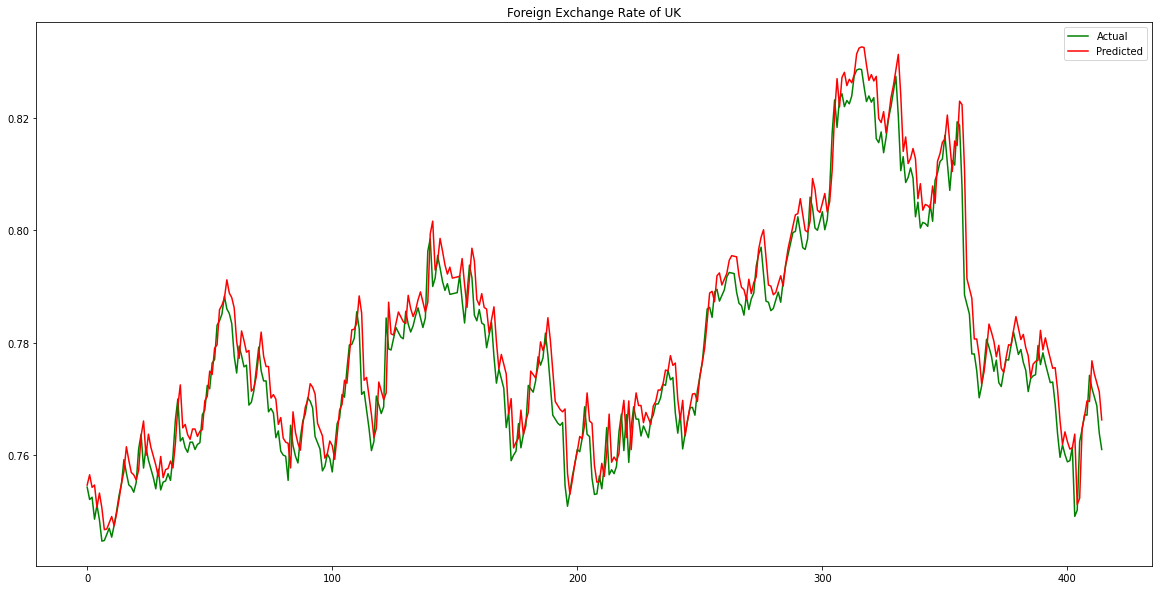

In [ ]:
#Visualizing the results
plt.figure(figsize=(20,10))
plt.title('Foreign Exchange Rate of UK')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2.1980155813095797e-05